In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

In [3]:
#パターン17のデータの取得
df17_1 = pd.read_csv("./取得データセット/受信機1/nkmr1-dataset17.csv")
df17_2 = pd.read_csv("./取得データセット/受信機2/nkmr2-dataset17.csv")
#df17_3 = pd.read_csv("./取得データセット/受信機3/nkmr")
df17_4 = pd.read_csv("./取得データセット/受信機4/nkmr4-dataset17.csv")

#それぞれのカラムの指定
df17_1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df17_2.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
#df17_3.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df17_4.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]


df17 = df17_1.append(df17_2).append(df17_4)

#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"

#locateを作成
df17["locate"] = 0
df17.locate = df17.locate.where(df17.UUIDs != id1,1)
df17.locate = df17.locate.where(df17.UUIDs != id2,2)
df17.locate = df17.locate.where(df17.UUIDs != id3,3)
df17.locate = df17.locate.where(df17.UUIDs != id4,4)
df17.locate = df17.locate.where(df17.UUIDs != id5,5)
df17.locate = df17.locate.where(df17.UUIDs != id6,6)
df17.locate = df17.locate.where(df17.UUIDs != id7,7)
df17.locate = df17.locate.where(df17.UUIDs != id8,8)
df17.locate = df17.locate.where(df17.UUIDs != id9,9)
df17.locate = df17.locate.astype(int)

#deviceを作成
df17["device"] = 0
df17.device = df17.device.where(df17.device_name != "rasp1",1)
df17.device = df17.device.where(df17.device_name != "nkmr-2",2)
#df17.device = df17.device.where(df17.device_name != "rasp3",3)
df17.device = df17.device.where(df17.device_name != "nkmr-4",3)

#座標を与える
df17["x"] = 0
df17["y"] = 0
df17.x,df17.y = df17.x.where(df17.UUIDs != id1,0),df17.y.where(df17.UUIDs != id1,0)
df17.x,df17.y = df17.x.where(df17.UUIDs != id2,0),df17.y.where(df17.UUIDs != id2,100)
df17.x,df17.y = df17.x.where(df17.UUIDs != id3,0),df17.y.where(df17.UUIDs != id3,200)
df17.x,df17.y = df17.x.where(df17.UUIDs != id4,100),df17.y.where(df17.UUIDs != id4,0)
df17.x,df17.y = df17.x.where(df17.UUIDs != id5,100),df17.y.where(df17.UUIDs != id5,100)
df17.x,df17.y = df17.x.where(df17.UUIDs != id6,100),df17.y.where(df17.UUIDs != id6,200)
df17.x,df17.y = df17.x.where(df17.UUIDs != id7,200),df17.y.where(df17.UUIDs != id7,0)
df17.x,df17.y = df17.x.where(df17.UUIDs != id8,200),df17.y.where(df17.UUIDs != id8,100)
df17.x,df17.y = df17.x.where(df17.UUIDs != id9,200),df17.y.where(df17.UUIDs != id9,200)

#発信機ごとに分ける
df17_1 = df17[(df17.UUIDs == id1) | (df17.UUIDs == set_uuid)]
df17_2 = df17[(df17.UUIDs == id2) | (df17.UUIDs == set_uuid)]
df17_3 = df17[(df17.UUIDs == id3) | (df17.UUIDs == set_uuid)]
df17_4 = df17[(df17.UUIDs == id4) | (df17.UUIDs == set_uuid)]
df17_5 = df17[(df17.UUIDs == id5) | (df17.UUIDs == set_uuid)]
df17_6 = df17[(df17.UUIDs == id6) | (df17.UUIDs == set_uuid)]
df17_7 = df17[(df17.UUIDs == id7) | (df17.UUIDs == set_uuid)]
df17_8 = df17[(df17.UUIDs == id8) | (df17.UUIDs == set_uuid)]
df17_9 = df17[(df17.UUIDs == id9) | (df17.UUIDs == set_uuid)]

df_list = [df17_1,df17_2,df17_3,df17_4,df17_5,df17_6,df17_7,df17_8,df17_9]

In [4]:
df17[df17.UUIDs != set_uuid].count()

UUIDs          129610
Major          129610
Minor          129610
Accuracy       129610
Proximity      129610
TxPower        129610
RSSI           129610
device_name    129610
timestamp      129610
x              129610
y              129610
locate         129610
device         129610
dtype: int64

### 時刻合わせ

In [5]:
#　オブジェクト型の目的変数を数値情報に変換
import sklearn.preprocessing as sp

# 前処理用のインスタンスを宣言
le = sp.LabelEncoder()

def set_time(data,set_uuid):
    """
    時刻合わせを行う
    第一引数はdataframe
    第２引数は時刻合わせを行うUUID
    """
    # 時刻合わせ用のビーコンを1秒間隔に設定
    set_time_df = data[data.UUIDs == set_uuid].drop_duplicates(['Minor'],keep = "first")
    # 時刻合わせ用ビーコン以外を定義
    df = data[data.UUIDs != set_uuid]
    # データを結合してインデックスでソート
    df = df.append(set_time_df).sort_index(ascending=True)
    # 時刻合わせ用ビーコンを取得した行にtimeカラムを設定
    df["time"] = df["Minor"].where(df["UUIDs"] == set_uuid)
    # 時刻合わせを行い欠損値がある部分は削除
    df = df.fillna(method="ffill").dropna()
    # int型に変換
    df["time"] = df["time"].astype(int)
    # 時刻合わせ用のビーコンデータ以外
    df = df[df["UUIDs"] != set_uuid]
    
    return df

# 前処理を各データフレームに行う
for (i,df) in enumerate(df_list):
    df_list[i] = set_time(df,set_uuid)
    # device_nameを変換
    #df_list[i]["device"] = le.fit_transform(df_list[i][df_list[i].columns[7]]) + 1

In [6]:
#plt.plot(df_list[2].time,df_list[2].RSSI,"bo")
df_list

[                                  UUIDs  Major  Minor  Accuracy Proximity  \
 6      10000000aaaa41441111110000000000      2     38  1.537381      near   
 9      10000000aaaa41441111110000000000      2     38  0.908852      near   
 13     10000000aaaa41441111110000000000      2     38  1.100289      near   
 15     10000000aaaa41441111110000000000      2     38  0.866442      near   
 18     10000000aaaa41441111110000000000      2     38  1.154145      near   
 22     10000000aaaa41441111110000000000      2     38  1.397251      near   
 29     10000000aaaa41441111110000000000      2     38  1.612630      near   
 34     10000000aaaa41441111110000000000      2     38  1.861210      near   
 37     10000000aaaa41441111110000000000      2     38  1.397251      near   
 39     10000000aaaa41441111110000000000      2     38  0.866442      near   
 43     10000000aaaa41441111110000000000      2     38  1.000000      near   
 48     10000000aaaa41441111110000000000      2     38  1.397251

### 直接波と反射波を識別する

In [7]:
# KMeansライブラリをインポート
from sklearn.cluster import KMeans

In [8]:
def make_cluster(df_list,colum,*,N_CLUSTERS=2):
    """
          反射波と入射波を判別するクラスタを作成し描写を行う
          第1引数(地点毎のデータフレームが入ったリスト)
          第２引数(クラスタリングを行いたいカラムのリスト)
          第３引数(クラスタ数)
          データフレーム型でクラスタリング結果を返す
    """

    # 空のデータフレームを用意
    df_cluster = pd.DataFrame()
    concat_list = []
    #座標ごとに
    for df in df_list: 
        #受信機ごとに
        for dev in df.device_name.unique():
            #受信機ごとに分けたdataframe
            df_dev = df[df.device_name == dev].copy()
            # 指定されたカラムを利用してクラスタリング
            pred = KMeans(n_clusters=N_CLUSTERS).fit_predict(np.array(df_dev[colum]))
            # clusterカラムを作成し予測結果を代入
            df_dev.loc[:,("cluster")] = pred
            # RSSI値の平均値を比較して入射波と反射波の判定を行う
            if df_dev[df_dev["cluster"] == 0]["RSSI"].mean() > df_dev[df_dev["cluster"] == 1]["RSSI"].mean():
                pass
            else:
                df_dev.loc[df_dev["cluster"] == 0,"cluster"] = 3
                df_dev.loc[df_dev["cluster"] == 1,"cluster"] = 0
                df_dev.loc[df_dev["cluster"] == 3,"cluster"] = 1
            # 予測結果を格納
            df_cluster = pd.concat([df_cluster,df_dev],ignore_index=True)
        concat_list.append(df_cluster)
        # 空のデータフレームを用意
        df_cluster = pd.DataFrame()

    return concat_list

In [9]:
df_list = make_cluster(df_list,["RSSI","locate"]) 

In [10]:
df_list[2][df_list[2].device == 4]

,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device,time,cluster


### 1秒ごとのRSSIの平均値を取る

In [11]:
def max_value(df_list):
    # timeのmax値を計算
    for df in df_list:
        max_value = 0
        if max_value < df["time"].max():
            max_value = df["time"].max()
    return max_value

#座標として、引数にx,yを追加
def get_mean(df,colum_name,locate,x,y,time_max):    
    """
    処理時間かかります。
    時刻毎の中央値をとる
    第一引数、データフレーム
    第２引数、作成したいカラム名
    """
    # 空のデータフレームとリストを用意
    Direct_list = []
    Reflect_list = []
    mid_df = pd.DataFrame()
    
    # timeのユニーク数だけ
    for time_num in range(time_max): 
        # 受信機の数だけ
        for i in range(len(df_list[0]["device"].unique())): 
            # timeラベルが同じ値に対して平均値をとる
            Direct = df[(df["time"] == time_num) & (df["device"] == (i+1)) & (df["cluster"] == 0)]["RSSI"].mean()
            Reflect = df[(df["time"] == time_num) & (df["device"] == (i+1)) & (df["cluster"] == 1)]["RSSI"].mean()
            # 平均値をリストに追加する
            Direct_list.append(Direct)
            Reflect_list.append(Reflect)
        # 平均値を追加したリストに(時間、地点、クラスタ番号を追加)
        Direct_list.extend([time_num,locate,x,y,0])
        Reflect_list.extend([time_num,locate,x,y,1])
        # データフレームに各要素を追加
        mid_df = mid_df.append(pd.Series(Direct_list),ignore_index=True)
        mid_df = mid_df.append(pd.Series(Reflect_list),ignore_index=True)
        # 平均値のリストを初期化
        Direct_list = []
        Reflect_list = []
    # カラム名を定義
    mid_df.columns = [colum_name]
    
    return mid_df

#前処理を各データフレームと地点毎に行う
train_df = pd.DataFrame()
column_name = ["dev1","dev2","dev4","time","locate","x","y","cluster"]
#column_name = ["dev1","dev2","dev3","dev4","time","locate","cluster"]
time_max = max_value(df_list)

for df in df_list:
    locate = df["locate"].iloc[1]
    x = df["x"].iloc[1]
    y = df["y"].iloc[1]
    mid_df = get_mean(df,column_name,locate,x,y,time_max)
    train_df = pd.concat([train_df,mid_df])

In [12]:
#NANのある行を削除し、time,locate,x,y,clusterをintに変換
direct = train_df[train_df.cluster == 0].dropna(thresh=4).interpolate().dropna()
reflect = train_df[train_df.cluster == 1].dropna(thresh=4).interpolate().dropna()
train = pd.concat([direct,reflect])
train.locate = train.locate.astype("int")
train.time = train.time.astype("int")
train.x = train.x.astype("int")
train.y = train.y.astype("int")
train.cluster = train.cluster.astype("int")
train

,dev1,dev2,dev4,time,locate,x,y,cluster
10,-81.000000,-77.250000,-76.500000,5,1,0,0,0
12,-82.000000,-82.000000,-75.200000,6,1,0,0,0
14,-81.000000,-79.000000,-73.500000,7,1,0,0,0
16,-82.000000,-78.000000,-75.250000,8,1,0,0,0
18,-81.750000,-75.500000,-75.500000,9,1,0,0,0
20,-81.000000,-77.500000,-78.000000,10,1,0,0,0
22,-81.000000,-78.000000,-74.500000,11,1,0,0,0
24,-81.000000,-79.500000,-75.500000,12,1,0,0,0
26,-82.000000,-81.000000,-74.500000,13,1,0,0,0
28,-81.375000,-77.333333,-74.000000,14,1,0,0,0


In [13]:
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 2,train[["dev1","dev2","dev4"]]*0.95)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 3,train[["dev1","dev2","dev4"]]*0.91)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 4,train[["dev1","dev2","dev4"]]*0.93)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 5,train[["dev1","dev2","dev4"]]*0.89)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 6,train[["dev1","dev2","dev4"]]*0.91)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 7,train[["dev1","dev2","dev4"]]*0.95)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 8,train[["dev1","dev2","dev4"]]*0.94)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 9,train[["dev1","dev2","dev4"]]*0.94)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev4"]]*0.99) 

### パターン16の読み込み

In [14]:
train2 = pd.read_csv("./加工データセット/pattarn16.csv")
train2.locate = train2.locate.astype("int")
train2.time = train2.time.astype("int")
train2.x = train2.x.astype("int")
train2.y = train2.y.astype("int")
train2.cluster = train2.cluster.astype("int")
train2 = train2.drop("Unnamed: 0",axis = 1)

In [15]:
train.count()

dev1       21553
dev2       21553
dev4       21553
time       21553
locate     21553
x          21553
y          21553
cluster    21553
dtype: int64

In [142]:
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 2,train2[["dev1","dev2","dev4"]]*0.95)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 3,train2[["dev1","dev2","dev4"]]*0.91)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 4,train2[["dev1","dev2","dev4"]]*0.93)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 5,train2[["dev1","dev2","dev4"]]*0.89)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 6,train2[["dev1","dev2","dev4"]]*0.91)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 7,train2[["dev1","dev2","dev4"]]*0.95)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 8,train2[["dev1","dev2","dev4"]]*0.94)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 9,train2[["dev1","dev2","dev4"]]*0.94)
#train2[["dev1","dev2","dev4"]] = train2[["dev1","dev2","dev4"]].where(train2.locate != 10,train2[["dev1","dev2","dev4"]]*0.99) 

### 学習用データセット1

In [36]:
#学習用とテスト用に分ける
#train_s = train[(train.locate != 2) & (train.locate != 4) & (train.locate != 6) & (train.locate != 8)]
#test_s =  train[(train.locate == 2) | (train.locate == 4) | (train.locate == 6) | (train.locate == 8)]
train_s = train[(train.locate != 2) & (train.locate != 4) & (train.locate != 5) & (train.locate != 6) & (train.locate != 8)]
test_s =  train[(train.locate == 2) | (train.locate == 4) | (train.locate == 5) | (train.locate == 6) | (train.locate == 8)]
#train_s = train[(train.locate != 4) & (train.locate != 6)]
#test_s =  train[(train.locate == 4) | (train.locate == 6)]
train_s2 = train2[(train2.locate != 2) & (train2.locate != 4) & (train2.locate != 5) & (train2.locate != 6) & (train2.locate != 8)]
test_s2 = train2[(train2.locate == 2) | (train2.locate == 4) | (train2.locate == 5) | (train2.locate == 6) | (train2.locate == 8)]

### 学習用データセット2

In [71]:
train_s = test_s = train.sample(frac=1).reset_index(drop=True)
train_s = train_s.iloc[0:len(train)*3//4]
test_s =  test_s.iloc[len(train)*3//4:len(train)]

train_s2 = test_s2 = train2.sample(frac=1).reset_index(drop=True)
train_s2 = train_s2.iloc[0:len(train2)*3//4]
train_s2 = train_s2.iloc[0:len(train_s2)*1//6]
test_s2 = test_s2.iloc[len(train2)*3//4:len(train2)]
test_s2 = test_s2.iloc[0:len(test_s2)*1//6]

In [15]:
train_s.count()

dev1       16164
dev2       16164
dev4       16164
time       16164
locate     16164
x          16164
y          16164
cluster    16164
dtype: int64

### データセットの用意(ラベルが座標)

In [37]:
from sklearn.utils import shuffle

# 学習用データセットを用意
#train_x = np.array(train_s[["dev1","dev2","dev3","dev4","cluster"]])
train_x = np.array(train_s[["dev1","dev2","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y = np.array(train_s[["x","y"]])
#train_x,train_y = shuffle(train_x,train_y)
#test_x = np.array(test_s[["dev1","dev2","dev3","dev4","cluster"]])
test_x = np.array(test_s[["dev1","dev2","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y = np.array(test_s[["x","y"]])
test_x,test_y = shuffle(test_x,test_y)


# 教師データのx、yに分けたものを用意
train_y_x = np.array(train_s["x"])
test_y_x = np.array(test_s["x"])
train_y_y = np.array(train_s["y"])
test_y_y = np.array(test_s["y"])
train_y_x,train_y_y = shuffle(train_y_x,train_y_y)
test_y_x,test_y_y = shuffle(test_y_x,test_y_y)

#パターン16の学習データセットを用意

# 学習用データセットを用意
train_x2 = np.array(train_s2[["dev1","dev2","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev2","dev3","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y2 = np.array(train_s2[["x","y"]])
train_x2,train_y2 = shuffle(train_x2,train_y2)
test_x2 = np.array(test_s2[["dev1","dev2","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev2","dev3","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y2 = np.array(test_s2[["x","y"]])
test_x2,test_y2 = shuffle(test_x2,test_y2)


# 教師データのx、yに分けたものを用意
train_y_x2 = np.array(train_s2["x"])
test_y_x2 = np.array(test_s2["x"])
train_y_y2 = np.array(train_s2["y"])
test_y_y2 = np.array(test_s2["y"])
train_y_x2,train_y_2y = shuffle(train_y_x2,train_y_y2)
test_y_x2,test_y_y2 = shuffle(test_y_x2,test_y_y2)

### データセットの用意(ラベルがlocate)

In [72]:
# 学習用データセットを用意
train_x = np.array(train_s[["dev1","dev2","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev2","dev3","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y = np.array(train_s[["locate"]])
train_x,train_y = shuffle(train_x,train_y)
test_x = np.array(test_s[["dev1","dev2","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev2","dev3","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y = np.array(test_s[["locate"]])
test_x,test_y = shuffle(test_x,test_y)

#パターン16の学習データセットを用意

# 学習用データセットを用意
train_x2 = np.array(train_s2[["dev1","dev2","dev4","cluster"]])
#train_x = np.array(train_s[["dev1","dev2","dev3","cluster"]])
#train_x = np.array(train_s[["dev1","dev3","cluster"]])
train_y2 = np.array(train_s2[["locate"]])
train_x2,train_y2 = shuffle(train_x2,train_y2)
test_x2 = np.array(test_s2[["dev1","dev2","dev4","cluster"]])
#test_x = np.array(test_s[["dev1","dev2","dev3","cluster"]])
#test_x = np.array(test_s[["dev1","dev3","cluster"]])
test_y2 = np.array(test_s2[["locate"]])
test_x2,test_y2 = shuffle(test_x2,test_y2)

### ランダムフォレスト(回帰) 

In [62]:
import sklearn
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=4,max_leaf_nodes=3,bootstrap=True,random_state=123,n_estimators=7)
#model = RandomForestRegressor()

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,74.443392,16.159313,200,100
1,74.443392,16.159313,100,100
2,78.864739,173.400744,0,100
3,74.443392,16.159313,200,100
4,78.864739,173.400744,200,100
5,193.085628,81.468409,100,0
6,78.864739,173.400744,100,200
7,78.864739,173.400744,0,100
8,75.680132,61.217734,100,200
9,74.443392,16.159313,200,100


In [63]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:57.637194804009596
yの誤差の平均値:72.77810111020476
ユークリッド距離:92.8369442953


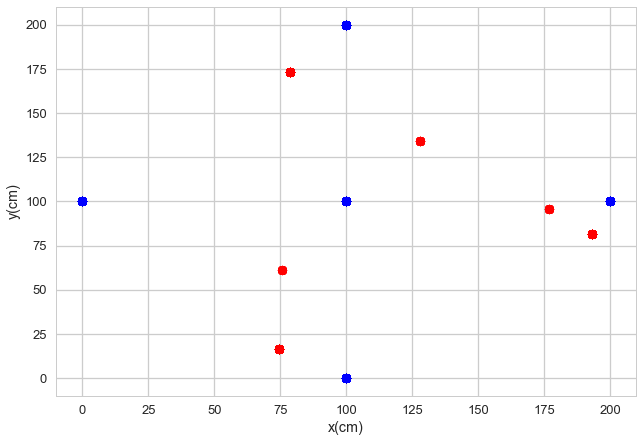

In [64]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge.pred_x,hoge.pred_y,"ro")
plt.plot(hoge.answer_x,hoge.answer_y,"bo")
plt.savefig("p17_2_randam.png")

In [65]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print(b[(b < 100)].count()/hoge.answer_x.count())

0.465191986644


### xgboost(回帰)

In [66]:
#xの予測
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=2)
reg = model.fit(train_x,train_y_x)
pred = reg.predict(test_x)

hoge1 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_x)],axis=1)
hoge1.columns = ["pred_x","answer_x"]

In [67]:
#yの予測
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=4)
reg = model.fit(train_x,train_y_y)
pred = reg.predict(test_x)

hoge2 = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y_y)],axis=1)
hoge2.columns = ["pred_y","answer_y"]
#hoge2.pred_y.astype(int).unique()

In [68]:
ave1 = abs(hoge1.pred_x - hoge1.answer_x).mean()
ave2 = abs(hoge2.pred_y - hoge2.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:43.104698181152344
yの誤差の平均値:44.50075149536133
ユークリッド距離:61.954272564


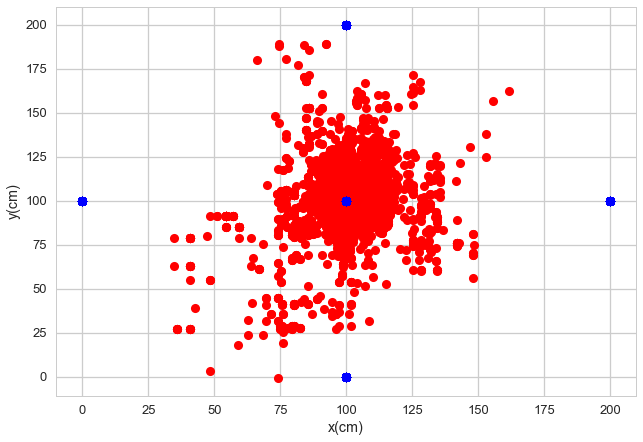

In [69]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge1.pred_x,hoge2.pred_y,"ro")
plt.plot(hoge1.answer_x,hoge2.answer_y,"bo")
plt.savefig("p17_2_xgboost.png")

In [70]:
a = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge1.pred_x - hoge1.answer_x)**2 + (hoge2.pred_y - hoge2.answer_y)**2).astype(int)
a.sort()
print(b[(b < 100)].count()/hoge.answer_x.count())

0.581051752922


### カーネルリッジ

In [24]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=1.0, kernel='rbf')

reg = model.fit(train_x,train_y)
pred = reg.predict(test_x2)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y2)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

,pred_x,pred_y,answer_x,answer_y
0,176.319561,24.222929,100,100
1,6.734073,192.237223,0,100
2,9.015829,9.146247,200,0
3,22.461947,11.590216,0,0
4,92.700574,104.441073,200,100
5,41.530482,193.086536,0,200
6,106.074976,20.140589,0,100
7,32.082483,199.380852,0,100
8,81.548288,158.534153,200,200
9,115.766026,108.404453,100,0


In [25]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

xの誤差の平均値:78.97071035605055
yの誤差の平均値:71.31526429080256
ユークリッド距離:106.406014938


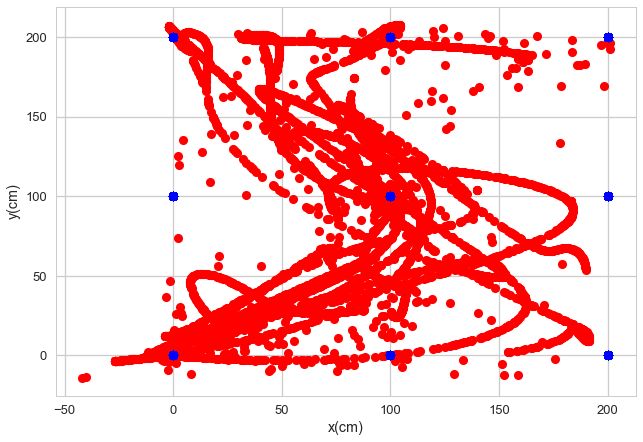

In [26]:
plt.xlabel("x(cm)")
plt.ylabel("y(cm)")
plt.plot(hoge.pred_x,hoge.pred_y,"ro")
plt.plot(hoge.answer_x,hoge.answer_y,"bo")
plt.savefig("p16_p17_1_ridge.png")

In [27]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print(b[(b < 100)].count()/hoge.answer_x.count())

0.344179223897


### リッジ

In [ ]:
from sklearn import linear_model

model = linear_model.Lasso(alpha=1.0) 
reg = model.fit(train_x,train_y)
pred = reg.predict(test_x)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
hoge.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge

In [ ]:
ave1 = abs(hoge.pred_x - hoge.answer_x).mean()
ave2 = abs(hoge.pred_y - hoge.answer_y).mean()
yuku = np.sqrt(ave1**2 + ave2**2)
print("xの誤差の平均値:%s" % ave1)
print("yの誤差の平均値:%s" % ave2)
print("ユークリッド距離:%s" % yuku)

In [ ]:
a = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int).unique()
b = np.sqrt((hoge.pred_x - hoge.answer_x)**2 + (hoge.pred_y - hoge.answer_y)**2).astype(int)
a.sort()
print(b[(b < 100)].count()/hoge.answer_x.count())

### ランダムフォレスト (分類)

In [1]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import (roc_curve, auc, accuracy_score)

model = RandomForestClassifier(n_estimators=100, random_state=0,max_depth = 4)

clf = model.fit(train_x2,train_y2)
pred = clf.predict(test_x2)

#fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
#auc(fpr, tpr)
#accuracy_score(pred, test_y)
hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y2)],axis=1)
hoge.columns = ["pred","answer"]

score = len(hoge[hoge.pred==hoge.answer])/len(hoge)
print("総合精度:%s" % score)
hoge

NameError: name 'train_x2' is not defined

In [102]:
#hoge[hoge.answer == 3].pred.unique()
a = hoge.answer.unique()
a.sort()
for i in a:
    print("\n",i)
    b = hoge[hoge.answer == i].pred.unique()
    b.sort()
    for f in b:
        print(f,hoge[(hoge.answer == i) & (hoge.pred == f)].pred.count())


 1
1 142
2 343
3 95
4 89
7 88
8 20
9 59

 2
3 418
4 337
6 2
7 62
9 9

 3
2 2
3 545
4 124
5 1
6 3
7 29
8 156
9 17

 4
2 279
3 1
5 334
7 62
8 110

 5
2 228
3 2
4 192
7 433
8 1

 6
2 414
3 155
4 30
6 168
7 12
8 29

 7
2 337
5 185
8 328

 8
2 427
8 442

 9
2 386
3 5
8 398


In [99]:
hoge[hoge.answer == 1].pred.unique()

array([2, 3, 1, 4, 9, 7, 8])

### XGBoost(分類)

In [103]:
#xgboost
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=4)
reg = model.fit(train_x,train_y)
pred = reg.predict(test_x2)

hoge = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y2)],axis=1)
hoge.columns = ["pred","answer"]

score = len(hoge[hoge.pred==hoge.answer])/len(hoge)
print("総合精度:%s" % score)
hoge

/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tomanan/anaconda/envs/py34/lib/python3.4/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


総合精度:0.2246966262168289


,pred,answer
0,8,3
1,5,3
2,4,6
3,5,5
4,1,8
5,5,4
6,7,4
7,1,6
8,4,2
9,8,9


In [ ]:
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 2,train[["dev1","dev2","dev4"]] + 3.32/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 3,train[["dev1","dev2","dev4"]] + 6.88/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 4,train[["dev1","dev2","dev4"]] + 5.09/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 5,train[["dev1","dev2","dev4"]] + 9.42/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 6,train[["dev1","dev2","dev4"]] + 7.49/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 7,train[["dev1","dev2","dev4"]] + 3.25/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 8,train[["dev1","dev2","dev4"]] + 4.26/2)
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 9,train[["dev1","dev2","dev4"]] + 4.17/2) 
#train[["dev1","dev2","dev4"]] = train[["dev1","dev2","dev4"]].where(train.locate != 10,train[["dev1","dev2","dev4"]] + 0.39) 

In [104]:
a = hoge.answer.unique()
a.sort()
for i in a:
    print("\n",i)
    b = hoge[hoge.answer == i].pred.unique()
    b.sort()
    for f in b:
        print(f,hoge[(hoge.answer == i) & (hoge.pred == f)].pred.count())


 1
1 82
2 122
3 81
4 16
5 196
6 51
7 116
8 172

 2
3 280
4 337
6 3
7 59
9 149

 3
3 415
4 115
5 131
6 47
7 2
8 137
9 30

 4
3 89
5 566
7 64
8 67

 5
1 26
3 2
4 21
5 422
7 385

 6
1 83
2 112
3 86
4 89
5 79
6 283
7 26
8 50

 7
1 34
2 129
5 283
8 404

 8
1 282
2 103
7 1
8 483

 9
1 189
2 345
3 4
4 1
6 43
8 207
